# Logistic Regression

### Load the data first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing, svm
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import sklearn.model_selection as model_selection
import pickle

#File Path
training_folder = 'training_data/'


# instantiate empty arrays for features and labels
Xtr = np.array([])
ytr = np.array([])
k = 0 # initialize

# load data from the relevant files
while True:
    try:
        # load data file
        class_k = np.loadtxt(training_folder + 'Class{:}.csv'.format(k))
        # extract features and labels
        class_k_features = class_k[:,:-1] # extract features
        class_k_labels  = class_k[:,-1].astype(np.int) # labels; convert to int
        # append the features and labels to the arrays
        Xtr = np.vstack([Xtr,class_k_features]) if Xtr.size else class_k_features
        ytr = np.hstack([ytr,class_k_labels]) if ytr.size else class_k_labels
        # increment counter
        k += 1
    except:
        print('loaded %i classes of training data' %k)
        break

# examine shape
num_classes = k
num_features = Xtr.shape[1]
num_samples = Xtr.shape[0]



print('unique labels: ', np.unique(ytr))
print('number of features: ', num_features)
print('number of samples: ', num_samples)

loaded 20 classes of training data
unique labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
number of features:  20
number of samples:  100000


### Standardize the Data and Split Data

In [2]:
#Get the mean and standard deviation of the training data
Xtr_mean = Xtr.mean(axis=0)
Xtr_std = Xtr.std(axis=0)

#Standardize the training data
Xtr_scale = (Xtr - Xtr_mean) / Xtr_std

#Split the data into testing and training sets with a 20/80 split
x_train,x_test,y_train,y_test = model_selection.train_test_split(Xtr_scale, ytr, test_size = 0.2, shuffle = True)

### Joint Training

In [4]:
#Initialize 
logreg_multi_joint = linear_model.LogisticRegression(C = 1, solver = 'newton-cg', multi_class='multinomial')


#Setting Confision Matrix and accuracy matrix
C_joint = np.zeros((20,20))
acc_joint =  []

#fit the data
logreg_multi_joint.fit(x_train, y_train)
yhat_temp =  logreg_multi_joint.predict(x_test)
    
#Measure performance and add confusion matrix
acc_joint.append(accuracy_score(yhat_temp,y_test))
C_joint = (confusion_matrix(y_test, yhat_temp))

acc_joint_mean = np.mean(acc_joint)

# save the model to disk
filename = 'Logistic_model.sav'
pickle.dump(logreg_multi_joint, open(filename, 'wb'))

print("Mean Accuracy:{}%".format(acc_joint_mean*100))

Mean Accuracy:86.935%


Drawing Confusion Matrix

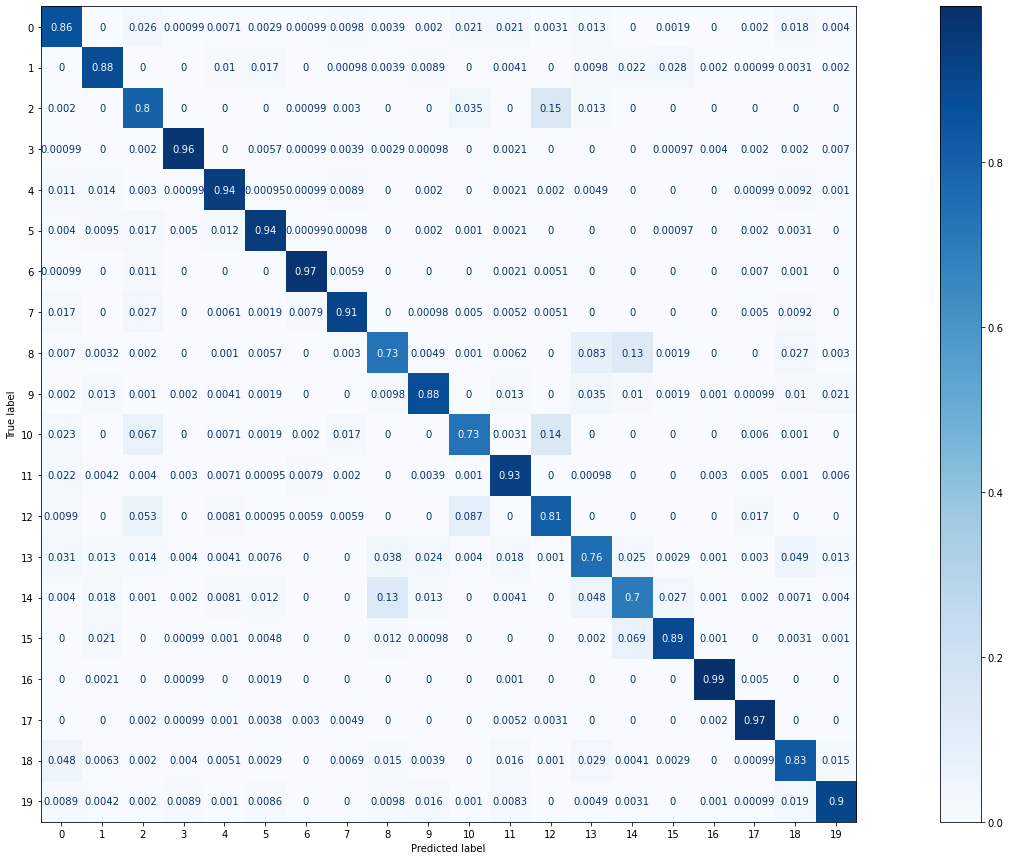

In [4]:
C_joint = C_joint/np.sum(C_joint,axis=1)
plt.rcParams['figure.figsize'] = [30, 15]
cmp = ConfusionMatrixDisplay(C_joint)
cmp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label',size =20)
plt.ylabel('Ture Label',size =20)

### One Versus Rest

In [5]:
#Initialize 
logreg_multi_ovsr = linear_model.LogisticRegression(C = 1, solver = 'liblinear', multi_class='ovr')

#Setting Confision Matrix and accuracy matrix
C_ovsr = np.zeros((20,20))
acc_ovsr =  []


#fit the data
logreg_multi_ovsr.fit(x_train, y_train)
yhat_temp =  logreg_multi_ovsr.predict(x_test)
    
#Measure performance and add confusion matrix
acc_ovsr.append(accuracy_score(yhat_temp,y_test))
C_ovsr = (confusion_matrix(y_test, yhat_temp))

acc_ovsr_mean = np.mean(acc_ovsr)

print("Mean Accuracy:{}%".format(acc_ovsr_mean*100))

Mean Accuracy:82.85%


Drawing Confusion Matrix

Text(0, 0.5, 'Ture Label')

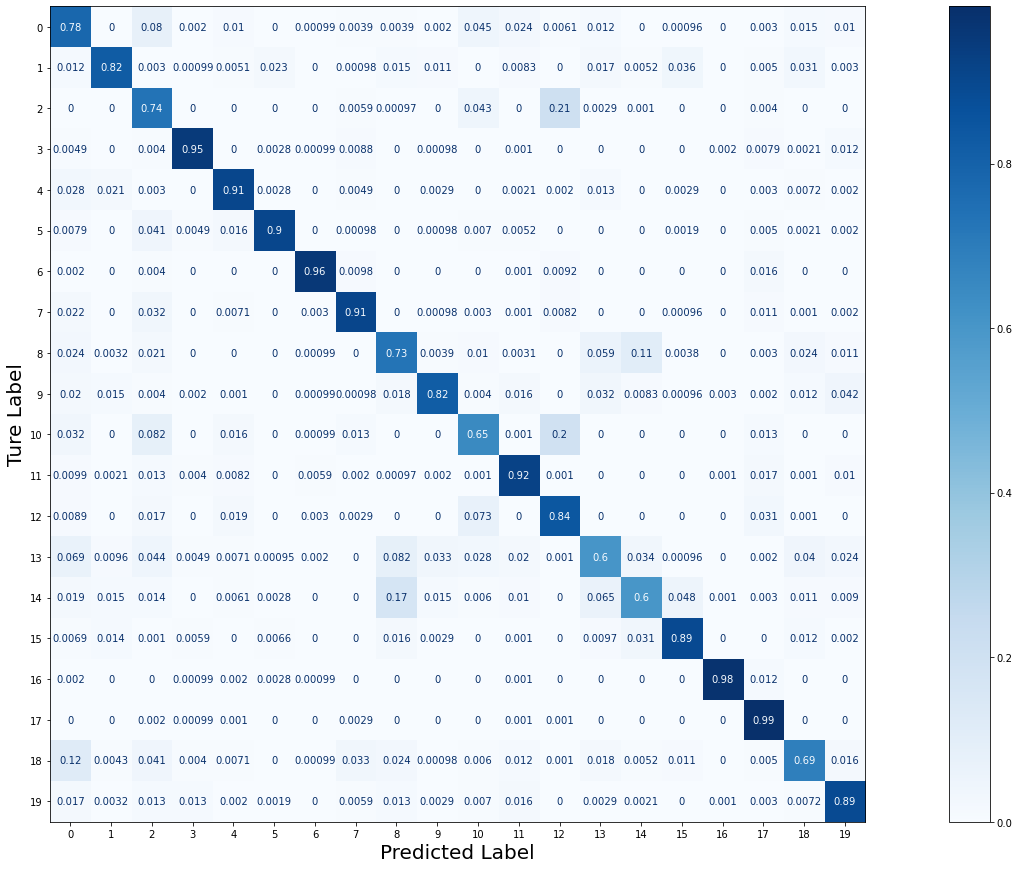

In [30]:
C_ovsr = C_ovsr/np.sum(C_ovsr,axis=1)
plt.rcParams['figure.figsize'] = [30, 15]
cmp = ConfusionMatrixDisplay(C_ovsr)
cmp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label',size =20)
plt.ylabel('Ture Label',size =20)

### L1-Regularization

In [7]:
#Setting the penalty variable and table to save results
reg_stre_inv = np.logspace(-1, 1.0, num=10)
accuracy_table = np.zeros((10,1))





for k, l in enumerate(reg_stre_inv):
    l1_logreg_temp = linear_model.LogisticRegression(penalty='l1', C = l, solver = 'liblinear', multi_class='ovr')
    l1_logreg_temp.fit(x_train, y_train)
    yhat_temp = l1_logreg_temp.predict(x_test)
    error_temp = np.mean(yhat_temp==y_test)
    accuracy_table[k] = error_temp 




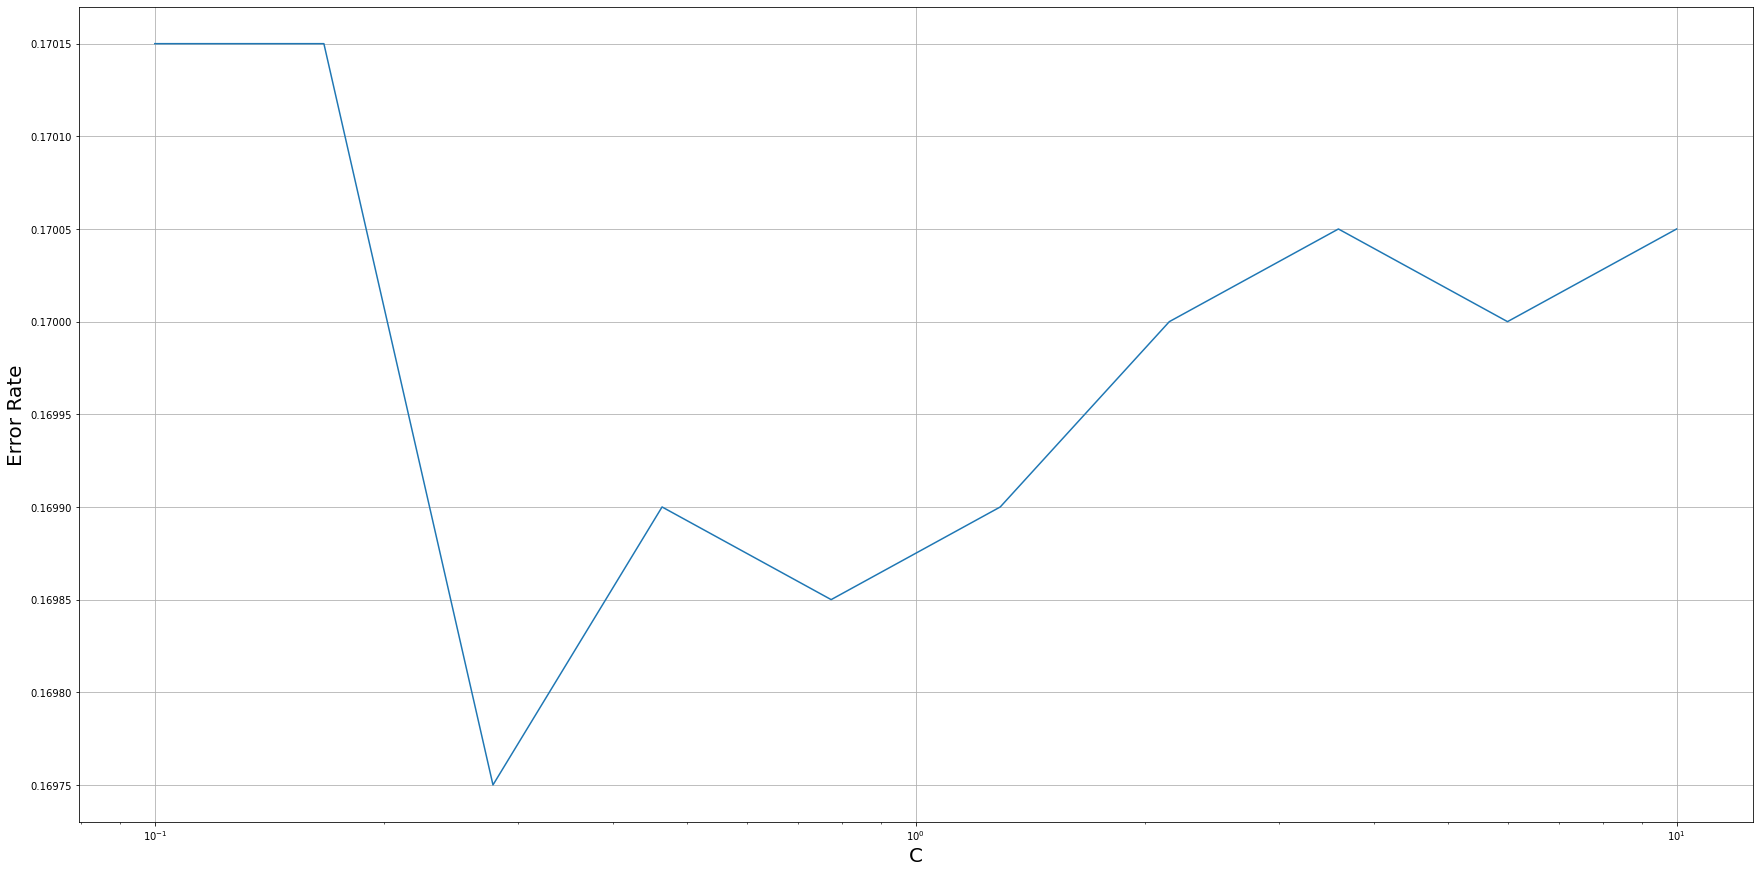

In [8]:
error_for_plt = np.mean(accuracy_table, axis = 1)
plt.plot(reg_stre_inv, 1-error_for_plt)
plt.xscale("log")
plt.xlabel('C',size =20)
plt.ylabel('Error Rate',size =20)
plt.grid(True)
plt.show()

In [9]:
max_entry = np.argmax(error_for_plt)
C_value = reg_stre_inv[max_entry]

print("Maximim A Accuracy Rate:{}%".format(error_for_plt[max_entry]*100))
print("C Value:{}".format(C_value))


Maximim A Accuracy Rate:83.025%
C Value:0.2782559402207124


In [17]:
#Setting l1 reg with optimize parameters
l1_logreg_opt = linear_model.LogisticRegression(penalty='l1', C =C_value, solver = 'liblinear', multi_class='ovr')

#Setting Confusion matrix
Con_opt = np.zeros((20,20))

l1_logreg_opt.fit(x_train, y_train)
yhat_opt = l1_logreg_opt.predict(x_test)
Con_opt = confusion_matrix(y_test, yhat_opt)
Opt_Acc = np.mean(yhat_temp==y_test)

print("Accuracy:{}%".format(Opt_Acc*100))

Accuracy:82.99499999999999%


Drawing Confusion Matrix

Text(0, 0.5, 'Ture Label')

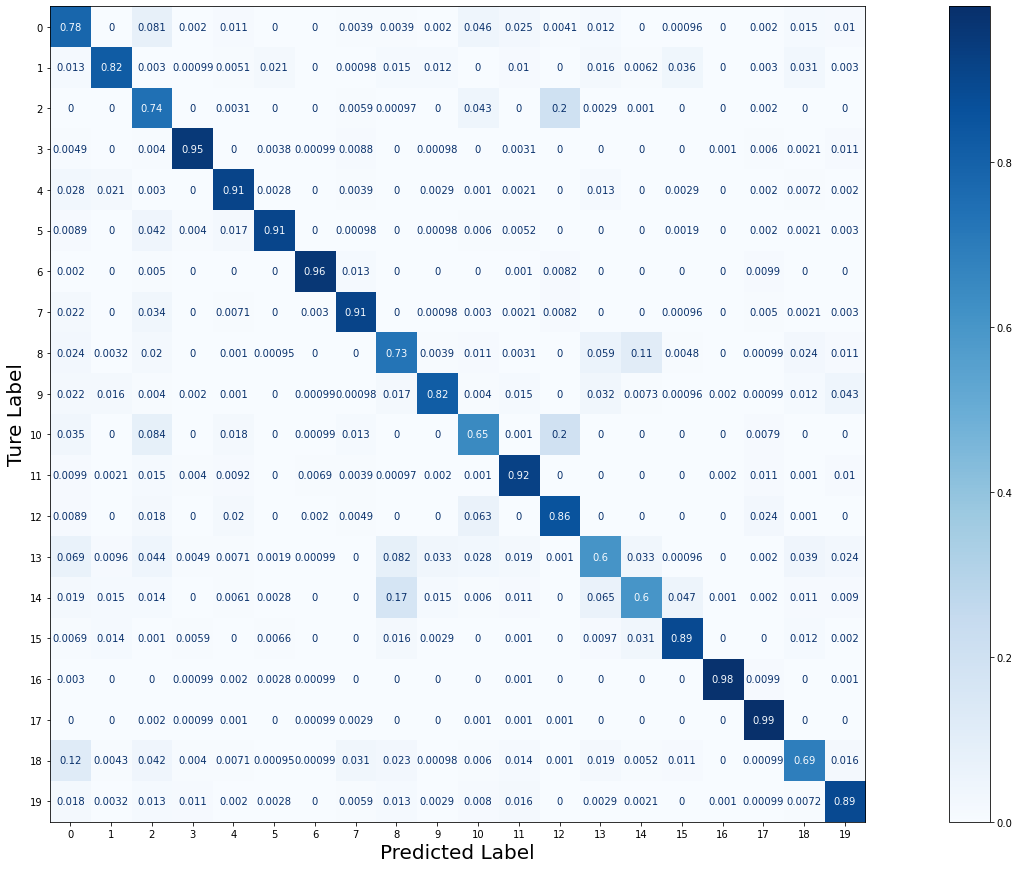

In [29]:
Con_opt = Con_opt/np.sum(Con_opt,axis=1)
plt.rcParams['figure.figsize'] = [30, 15]
cmp = ConfusionMatrixDisplay(Con_opt)
cmp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label',size =20)
plt.ylabel('Ture Label',size =20)

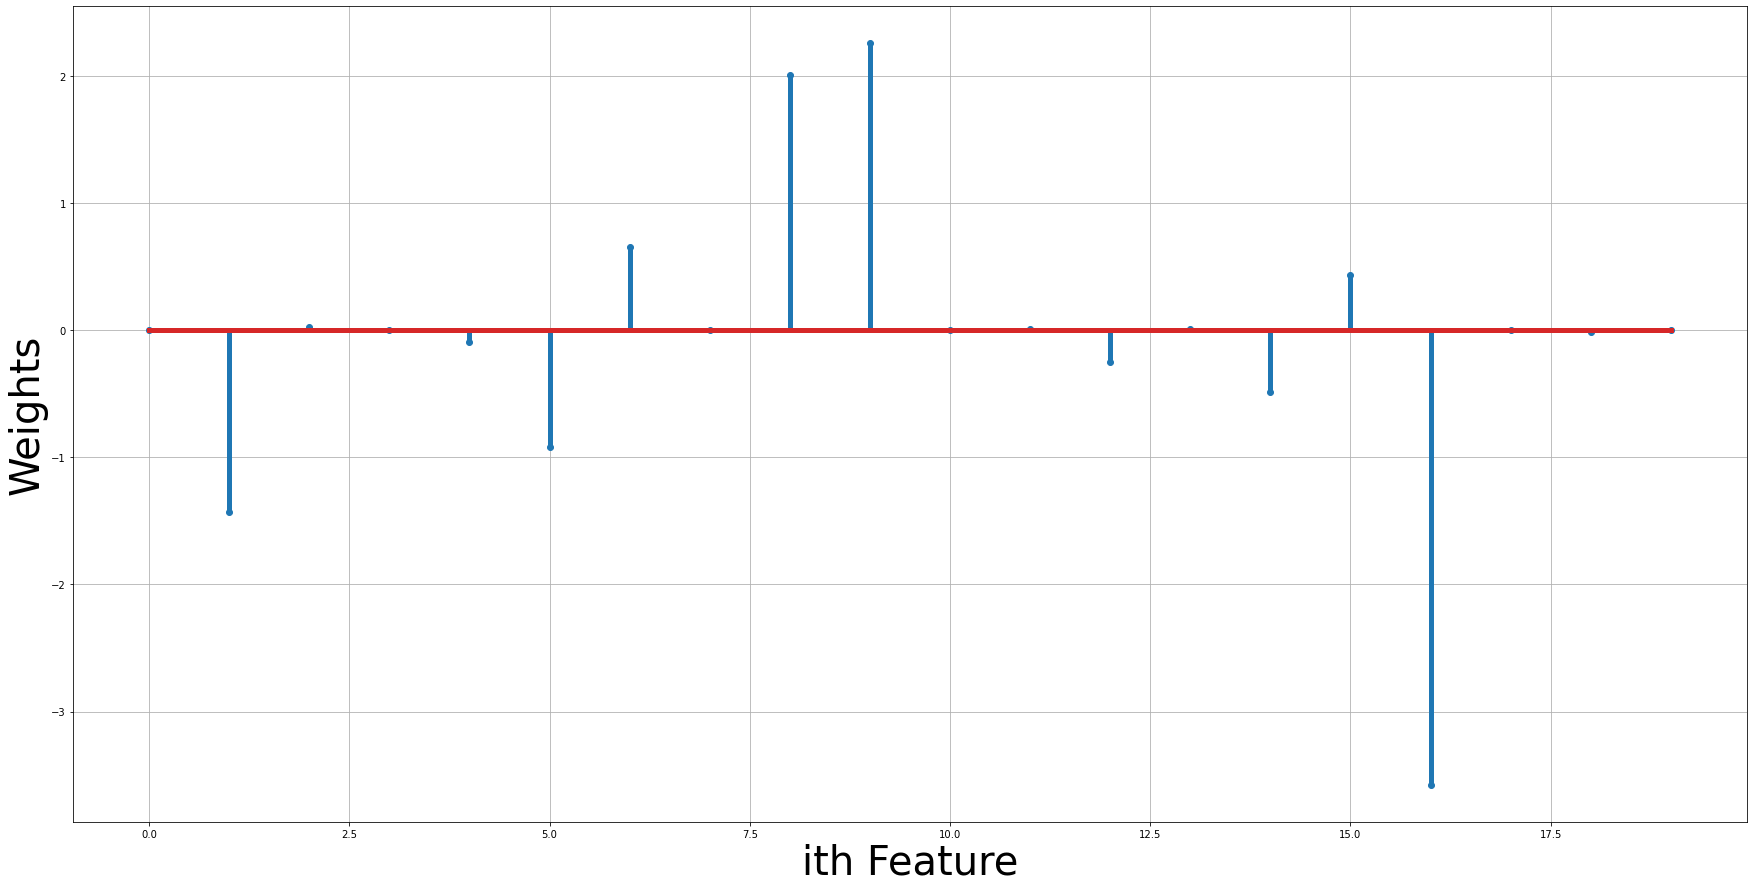

In [27]:
W_l1= l1_logreg_opt.coef_
xm_for_plt = np.linspace(0, 19, 20)
plt.xlabel('ith Feature',size =40)
plt.ylabel('Weights',size =40)
plt.grid(True)
stemlines = plt.stem(xm_for_plt, W_l1[0], use_line_collection=True)
plt.setp(stemlines, 'linewidth', 5)
plt.show()


### Over all Training

In [20]:
#Initialize Classifier
svc_joint_overall = linear_model.LogisticRegression(C = 1, solver = 'newton-cg', multi_class='multinomial')



#Setting Confision Matrix and accuracy matrix
C_joint_overall = np.zeros((20,20))
acc_joint_overall =  []


#fit the data
svc_joint_overall.fit(Xtr_scale, ytr)
yhat_temp = svc_joint_overall.predict(Xtr_scale)
    
#Measure performance and add confusion matrix
acc_joint_overall.append(accuracy_score(yhat_temp,ytr))
C_joint_overall = (confusion_matrix(ytr, yhat_temp))

acc_joint_mean = np.mean(acc_joint_overall)


print("Mean Accuracy:{}%".format(acc_joint_mean*100))

Mean Accuracy:87.02499999999999%


Text(0, 0.5, 'Ture Label')

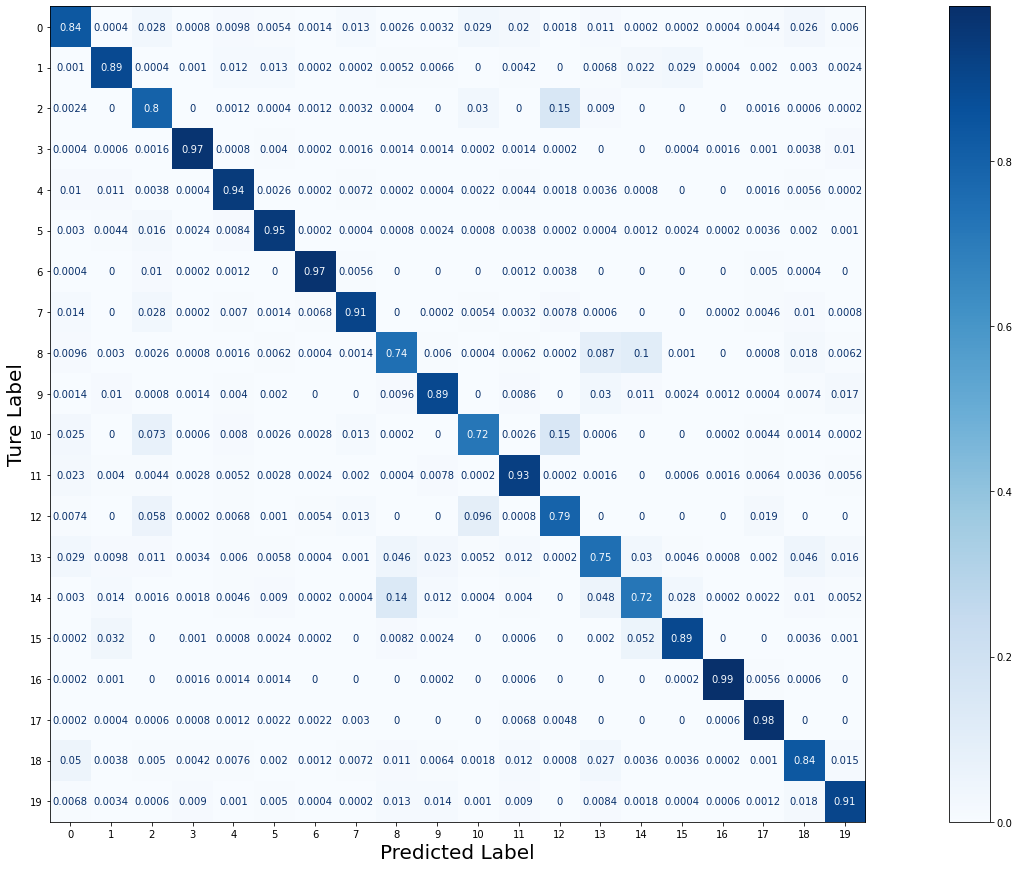

In [28]:
C_joint_overall = C_joint_overall/np.sum(C_joint_overall,axis=1)
plt.rcParams['figure.figsize'] = [30, 15]
cmp = ConfusionMatrixDisplay(C_joint_overall)
cmp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label',size =20)
plt.ylabel('Ture Label',size =20)